In [1]:
import osmnx as ox
import pickle

In [ ]:
!curl -s "https://nominatim.openstreetmap.org/search?q=Wroclaw&format=json" | jq '.[] | select(.osm_type=="relation")'

In [15]:
place = "Wrocław, województwo dolnośląskie, Polska"

In [10]:
gdf = ox.geocoder.geocode_to_gdf(place)
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((7.41915 43.73889, 7.41998 43.73824, ...",43.746086,43.737071,7.4338,7.419148,285456022,relation,5986438,43.740296,7.426559,"Monte-Carlo, Monaco, 98000, Monaco",boundary,administrative,1.115273


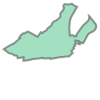

In [11]:
polygon = gdf['geometry'][0]
polygon

In [12]:
graph = ox.graph.graph_from_polygon(polygon, network_type='bike')

In [13]:
ox.plot_graph_folium(graph)

In [14]:
with open('polys/Monte', "wb") as poly_file:
    pickle.dump(polygon, poly_file, pickle.HIGHEST_PROTOCOL)

In [6]:
ox.io.save_graphml(graph, filepath='mls/Wroclaw')

# Todo:


- lista miast z numerami relacji w osm
- eksport do grafow
- poszukac toola do diff-ów w networkx
    - zrobcie zrzut z dwoch pkt w czasie, odejmijcie wezly i plot diffa grafowego w folium z osmnx
- ekstra: postawic osm-a 

In [3]:
grap_first = ox.io.load_graphml('mls/Wroclaw')
grap_second = ox.io.load_graphml('mls/Zurich')
grap_third = ox.io.load_graphml('mls/Wroclaw')

# Show difference

In [4]:
import networkx as nx

In [44]:
def difference(first, second):
    dif = nx.create_empty_copy(second)
    dif.name = "Difference of (%s and %s)" % (first.name, second.name)
    
    dif_nodes = set(second) - set(first)    
    if len(dif_nodes) == 0:
        print("There are no new nodes")
        

    dif_edges = set(second.edges()) - set(first.edges())
    dif.add_edges_from(dif_edges)
    
    # I'm not sure what the goal is: the difference, or the edges that are in R but not in S
    # In case it is the difference:
    #diff_edges = second_edges.symmetric_difference(first_edges)

    # In case its the edges that are in R but not in S:
    # diff_edges = second_edges - first_edges

    return dif

In [45]:
print("Frist graph")
ox.plot_graph_folium(grap_first)

Frist graph


Exception ignored in: <function WKBWriter.__del__ at 0x7fc359401e50>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/shapely/geos.py", line 514, in __del__
    if self._lgeos is not None:
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
print("Second graph")
ox.plot_graph_folium(grap_second)

In [47]:
print("Diff graph")
dif_grap = difference(grap_first, grap_third)
if len(dif_grap.edges()) != 0:
    ox.plot_graph_folium(difference(grap_first, grap_third))
else:
    print("There are no new edges")

Diff graph
There are no new nodes
There are no new edges


# Remove equel

In [5]:
def clean(first, second):
    dif_edges = set(second.edges()) - set(first.edges())
    if len(dif_edges) == 0:
        dif_nodes = set(second) - set(first)
        if len(dif_nodes) == 0:
            return True
    
    return False

In [6]:
print(clean(grap_first, grap_third))

True


In [7]:
print(clean(grap_first, grap_second))

False


# CREATE GRAPHS

In [1]:
import pickle
import networkx as nx
import osmnx as ox
import os

In [2]:
city="Berlin"
osmn_map="osm_files/europe_germany_2022_01_01.osm"

In [3]:
poly_load_filename = os.path.join("polys", city)
with open(poly_load_filename, "rb") as poly_file:
        polygon = pickle.load(poly_file)

ox.utils.config(
        nominatim_endpoint='http://localhost:8080', 
        overpass_endpoint='http://localhost:12345/api/', 
        overpass_rate_limit=False
)

In [ ]:
G = ox.graph_from_xml(osmn_map)

In [ ]:
ox.plot_graph_folium(G)